#       	MOVIE RECOMMENDED SYSTEM

#  Data Description 
Data Description -:
  The  data  consists  of  105339  ratings  applied  over  10329  movies.
  The  average  rating  and minimum and maximum rating are0.5 and 5 respectively. 
  There are 668 users who have given their ratings for 149532 movies.
  There are two data files which are provided:
      Movies.csv
        ●movieId:IDassigned to a movie 
        ●title:Title of a movie 
        ●genres:pipe-separated list of movie genres. 
      Ratings.csv
        ●userId:ID assigned to a user 
        ●movieId:ID assigned to a movie 
        ●rating:rating by auser to a movie 
        ●Timestamp:timeatwhichtheratingwasprovided.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets



In [2]:
#loading Dataset of ratings 
ratings = pd.read_csv("C:/Users/Kalpesh__K__/Datasets/ratings.csv")

In [3]:
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [4]:
ratings.shape

(105339, 4)

In [5]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [6]:
# Loafing Dataset of Movie
movies = pd.read_csv("C:/Users/Kalpesh__K__/Datasets/movies.csv")


In [7]:
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [8]:
movies.shape

(10329, 3)

In [9]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [10]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [11]:
# Check number of rows and columns in each dataset

In [12]:
print("Number of rows and columns in Movies dataset: ", movies.shape)

Number of rows and columns in Movies dataset:  (10329, 3)


In [13]:
print("Number of rows and columns in Ratings dataset: ", ratings.shape)

Number of rows and columns in Ratings dataset:  (105339, 4)


In [14]:
# Check for missing values


In [15]:
print("Number of missing values in Movies dataset: ", movies.isnull().sum().sum())


Number of missing values in Movies dataset:  0


In [16]:
print("Number of missing values in Ratings dataset: ", ratings.isnull().sum().sum())


Number of missing values in Ratings dataset:  0


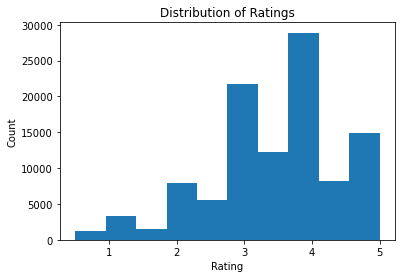

In [17]:
# Check distribution of ratings
plt.hist(ratings['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


In [18]:
# Check number of unique users and movies

In [19]:
print("Number of unique users: ", ratings['userId'].nunique())

Number of unique users:  668


In [20]:
print("Number of unique movies: ", ratings['movieId'].nunique())

Number of unique movies:  10325


In [21]:
df = pd.concat([movies, ratings], axis=1)

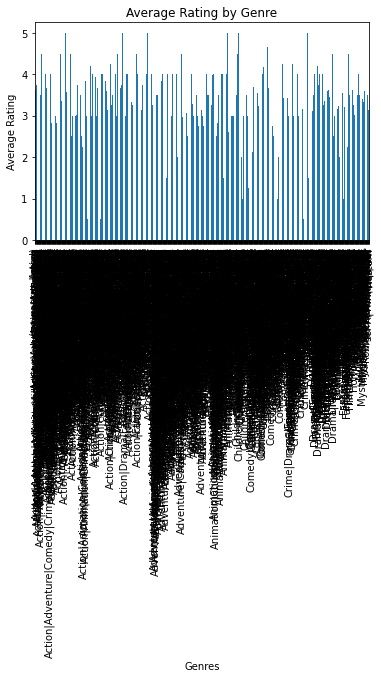

In [ ]:

# Check average rating and total movies at genre level
genre_ratings = df.groupby(['genres'])['rating'].agg(['mean', 'count'])
genre_ratings['mean'].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.show()
genre_ratings['count'].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.show()


In [ ]:

# Check unique genres considered
unique_genres = set()
for genres in movies['genres']:
    unique_genres.update(genres.split('|'))
print("Unique genres considered: ", unique_genres)


In [ ]:
genre_stats = movies.merge(ratings, on='movieId', how='inner')
genre_stats = genre_stats.groupby('genres').agg({'rating': [np.mean], 'movieId': [pd.Series.nunique]})
genre_stats.columns = ['_'.join(col).strip() for col in genre_stats.columns.values]
genre_stats = genre_stats.sort_values(by='rating_mean', ascending=False)
print(genre_stats)


In [ ]:
# Plot the distribution of movie ratings
sns.displot(data=ratings, x='rating', bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
# Plot the distribution of the number of ratings per movie
import matplotlib.pyplot as plt

# Get the number of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count()

# Plot the distribution
plt.hist(ratings_per_movie, bins=50)
plt.xlabel('Number of ratings per movie')
plt.ylabel('Frequency')
plt.show()

#sns.displot(data=genre_ratings, x='rating_count', bins=50)
#plt.title('Distribution of Number of Ratings per Movie')
#plt.xlabel('Number of Ratings')
#plt.ylabel('Count')
#plt.show()



In [ ]:


# Group movies by genre and calculate the average rating for each genre
genre_ratings = movies.join(ratings.set_index('movieId'), on='movieId').groupby('genres')['rating'].mean()

# Plot the distribution of the average rating per genre
genre_ratings.plot(kind='bar', figsize=(12,8))
plt.title('Average Rating per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
ratings.columns

In [ ]:
movies.columns


In [ ]:
ratings_with_genres = pd.merge(ratings, movies[['movieId', 'genres']], on='movieId')


In [ ]:
ratings_with_genres.head(5)

In [ ]:
ratings_with_genres = pd.merge(ratings, movies[['movieId', 'genres']], on='movieId')

# Group the ratings dataframe by genre
genre_ratings = ratings_with_genres.join(movies['genres'].str.get_dummies('|')).groupby('genres').agg({'rating': [np.mean], 'movieId': [pd.Series.nunique]})

# Flatten the multi-level columns
genre_ratings.columns = ['_'.join(col).strip() for col in genre_ratings.columns.values]

# Sort the dataframe by average rating
genre_ratings = genre_ratings.sort_values(by=['rating_mean'], ascending=False)

# Print the results
print(genre_ratings)


In [ ]:
# Calculate the popularity of each movie
popularity = ratings.groupby('movieId')['rating'].count().reset_index()
popularity.columns = ['movieId', 'popularity']


In [ ]:
popularity

In [ ]:
# Filter the movies by the popularity
min_popularity = 10
popular_movies = popularity[popularity['popularity'] >= min_popularity]
ratings = ratings[ratings['movieId'].isin(popular_movies['movieId'])]
print(popular_movies)
#print(top_movies[['title', 'avg_rating']])


In [ ]:
# Filter the movies by the popularity
min_popularity = 10
popular_movies = popularity[popularity['popularity'] >= min_popularity]
ratings = ratings[ratings['movieId'].isin(popular_movies['movieId'])]
print(popular_movies)
#print(top_movies[['title', 'avg_rating']])


In [ ]:
# Calculate the average rating for each movie
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.columns = ['movieId', 'avg_rating']
print(avg_ratings)

In [ ]:
# Merge the movie titles and average ratings
recommendations = pd.merge(movies[['movieId', 'title']], avg_ratings, on='movieId')
print(recommendations)

In [ ]:
# Sort the movies by their average rating
recommendations = recommendations.sort_values('avg_rating', ascending=False)


print(recommendations)

In [ ]:
import pandas as pd

# Define the input parameters
genre = 'Action'
min_rating = 3
top_n = 5

# Filter the movies by the input genre and minimum rating threshold
movies = movies[movies['genres'].str.contains(genre)]
ratings = ratings[ratings['movieId'].isin(movies['movieId'])]
ratings = ratings[ratings['rating'] >= min_rating]





# Select the top N movies and return their titles and average ratings
top_movies = recommendations.head(top_n)
print(top_movies[['title', 'avg_rating']])


In [ ]:
ratings.columns

In [ ]:
movies.columns

In [ ]:
print(ratings['rating'])

In [ ]:
ratings.columns

# 1.Create a popularity-basedrecommender system at a genre level. 
The userwill input a genre (g), minimum ratingthreshold (t) for a movie,and no. ofrecommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.Example:Input:•Genre (g) : Comedy•Minimumreviewsthreshold(t):100•Num recommendations (N) : 5

In [ ]:
# User inputs
genre = input("Enter a genre: ")
min_rating_threshold = float(input("Enter a minimum rating threshold: "))
num_recommendations = int(input("Enter the number of recommendations: "))

# Filter the movies dataset by genre and minimum rating threshold
genre_movies = movies[movies['genres'].str.contains(genre)]
genre_ratings = ratings[ratings['movieId'].isin(genre_movies['movieId'].tolist())]
genre_ratings_counts = genre_ratings.groupby('movieId')['rating'].count().reset_index()
genre_ratings_counts.rename(columns={'rating':'num_ratings'}, inplace=True)
popular_movies = genre_ratings_counts[genre_ratings_counts['num_ratings'] >= min_rating_threshold]
popular_movies = popular_movies.merge(movies, on='movieId', how='left')

# Sort the popular movies by average rating and number of reviews
popular_movies['average_rating'] = popular_movies['movieId'].apply(lambda x: ratings[ratings['movieId']==x]['rating'].mean())
popular_movies = popular_movies.sort_values(['average_rating', 'num_ratings'], ascending=False)

# Display top N movie recommendations
print("Top {} recommendations for genre '{}':".format(num_recommendations, genre))
for i, row in popular_movies.head(num_recommendations).iterrows():
    print("{}. {} (Avg. rating: {:.2f}, Num. reviews: {})".format(i+1, row['title'], row['average_rating'], row['num_ratings']))

    

In [ ]:
# User inputs
genre = input("Enter a genre: ")
min_rating_threshold = float(input("Enter a minimum rating threshold: "))
num_recommendations = int(input("Enter the number of recommendations: "))

# Filter the movies dataset by genre and minimum rating threshold
genre_movies = movies[movies['genres'].str.contains(genre)]
genre_ratings = ratings[ratings['movieId'].isin(genre_movies['movieId'].tolist())]
genre_ratings_counts = genre_ratings.groupby('movieId')['rating'].count().reset_index()
genre_ratings_counts.rename(columns={'rating':'num_ratings'}, inplace=True)
popular_movies = genre_ratings_counts[genre_ratings_counts['num_ratings'] >= min_rating_threshold]
popular_movies = popular_movies.merge(movies, on='movieId', how='left')

# Sort the popular movies by average rating and number of reviews
popular_movies['average_rating'] = popular_movies['movieId'].apply(lambda x: ratings[ratings['movieId']==x]['rating'].mean())
popular_movies = popular_movies.sort_values(['average_rating', 'num_ratings'], ascending=False)

# Display top N movie recommendations
print("Top {} recommendations for genre '{}':".format(num_recommendations, genre))
for i, row in popular_movies.head(num_recommendations).iterrows():
    print("{}. {} (Avg. rating: {:.2f}, Num. reviews: {})".format(i+1, row['title'], row['average_rating'], row['num_ratings']))


#  .Create a content-based recommender system thatrecommends top N movies based on similar movie(m) genres.Example:Input:•Movie Title (t): Toy Story•Num recommendations (N): 5

In [ ]:
# Step 1: Calculate the similarity scores between the target user and all other users based on their ratings

# create a pivot table with users as rows, movies as columns and ratings as values
pivot_table = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# calculate the cosine similarity between the target user and all other users
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = cosine_similarity(pivot_table.fillna(0))

# Step 2: Select the top K most similar users to the target user
k = 100  # threshold for similar users
target_user = 1  # user for whom recommendations are being made

# get the indices of the top k similar users to the target user
similar_users_indices = user_similarities[target_user-1].argsort()[-k-1:-1][::-1]

# Step 3: Identify the movies that the target user has not yet seen but have been seen and rated by the top K similar users
# get the movies that the target user has not yet seen
movies_not_seen = pivot_table.loc[target_user][pivot_table.loc[target_user].isnull()].index

# create a dataframe containing the ratings for these movies by the top k similar users
similar_users_ratings = pivot_table.loc[similar_users_indices, movies_not_seen]

# Step 4: Calculate the predicted ratings for the target user for these movies
# calculate the weighted average of the ratings for each movie by the top k similar users
predicted_ratings = similar_users_ratings.apply(lambda x: np.dot(x.fillna(0), user_similarities[target_user-1][similar_users_indices]) / user_similarities[target_user-1][similar_users_indices].sum(), axis=0)

# Step 5: Recommend the top N movies based on the predicted ratings
n = 5  # number of recommendations to make
top_n_movies = predicted_ratings.sort_values(ascending=False)[:n].index.tolist()

# print the top N recommended movies
print("Top {} recommended movies for user {}:".format(n, target_user))
for movie_id in top_n_movies:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print("- " + movie_title)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load movies dataset
#movies = pd.read_csv('movies.csv')

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN values in 'genres' column with empty string
movies['genres'] = movies['genres'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to get movie recommendations based on movie title
def get_recommendations(title, N):
    # Get the index of the movie that matches the title
    indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the N most similar movies
    sim_scores = sim_scores[1:N+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top N most similar movies
    return movies['title'].iloc[movie_indices]

# Test the function
get_recommendations('Toy Story (1995)', 5)


In [ ]:


# Merge data
movie_ratings = pd.merge(movies, ratings, on='movieId')

# Pivot table to get matrix of users and their movie ratings
user_movie_ratings = pd.pivot_table(movie_ratings, index='userId', columns='title', values='rating')

# Function to get top N recommended movies for target user
def get_top_n_recommended_movies(target_user_id, N, k):
    # Get target user's movie ratings
    target_user_ratings = user_movie_ratings.loc[target_user_id].dropna()
    
    # Find similar users based on cosine similarity
    cosine_similarities = user_movie_ratings.corrwith(target_user_ratings)
    similar_users = cosine_similarities.dropna().sort_values(ascending=False)[:k]
    
    # Get movie ratings of similar users
    similar_users_ratings = user_movie_ratings.loc[similar_users.index]
    
    # Calculate weighted average of movie ratings of similar users
    similar_users_weighted_ratings = (similar_users_ratings.T * similar_users).T.sum().div(similar_users.sum())
    
    # Filter out movies that the target user has already rated
    recommended_movies = similar_users_weighted_ratings.drop(target_user_ratings.index).sort_values(ascending=False)[:N]
    
    # Get movie titles for recommended movies
    recommended_movie_titles = pd.DataFrame(recommended_movies).merge(movies, left_index=True, right_on='title')['title']
    
    return recommended_movie_titles

# Example 
target_user_id = int(input('Enter user ID: '))
N = int(input('Enter number of recommendations: '))
k = int(input('Enter threshold for similar users: '))

recommended_movies = get_top_n_recommended_movies(target_user_id, N, k)

print('Top', N, 'recommended movies for user', target_user_id, ':')
for i, movie_title in enumerate(recommended_movies):
    print(i+1, movie_title)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets

# Load the movie data
movies = pd.read_csv('C:/Users/Kalpesh__K__/Datasets/movies.csv')

# Compute the TF-IDF matrix for movie genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define the recommendation function
def get_recommendations(title, n):
    # Get the index of the movie
    idx = movies[movies['title'] == title].index[0]
    
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top n movies
    sim_scores = sim_scores[1:n+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the recommended movies
    return movies.iloc[movie_indices]['title'].tolist()

# Define the GUI widgets
title_widget = widgets.Text(
    value='',
    placeholder='Enter a movie title',
    description='Movie Title:',
    disabled=False
)

n_widget = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Number of Recommendations:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

output_widget = widgets.Output()

# Define the event handlers
def on_submit_button_clicked(b):
    with output_widget:
        output_widget.clear_output()
        title = title_widget.value.strip()
        n = n_widget.value
        recommendations = get_recommendations(title, n)
        print(f"Top {n} Recommendations for '{title}':")
        for i, movie in enumerate(recommendations):
            print(f"{i+1}. {movie}")

# Define the GUI layout
form_items = [
    title_widget,
    n_widget
]

form = widgets.Box(form_items, layout=widgets.Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch',
    width='50%'
))

submit_button = widgets.Button(description='Get Recommendations')
submit_button.on_click(on_submit_button_clicked)

display(form, submit_button, output_widget)


#                                              Thank You